In [1]:
from Corrections.EGM.eleCorrections import *
from Corrections.MUO.muCorrections import *
import ROOT
import JupyROOT.helpers.utils
JupyROOT.helpers.utils.GetGeometryDrawer = lambda:None # magic fix to make ROOT faster
import cppyy
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import math
import uproot
import awkward as ak

Welcome to JupyROOT 6.24/07


In [2]:
inp = uproot.open("/grid_mnt/data__data.polcms/cms/cuisset/cmt/PreprocessRDF/ul_2018_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M600/cat_base_selection/prod_240610/data_12.root:Events").arrays()
inp

<Array [{bunchCrossing: 4294967295, ... ] type='128 * {"bunchCrossing": uint32, ...'>

## Electron SFs

In [3]:
rdf_mod = eleSFRDFProducer(year=2018, isUL=True, isMC=True, wps=["wp80iso", "RecoAbove20"])

In [21]:
list(cppyy.gbl.get_ele_sf("sfup", "wp80iso", [2.], [30.]))

[0.9301777244921896]

In [16]:
bug = None
for evt in inp:
    sfs = np.array(cppyy.gbl.get_ele_sf("sfdown", "wp80iso", evt.Electron_eta, evt.Electron_pt))
    print(sfs)
    if np.any(sfs < 0.5):
        bug = evt

[1.]
[]
[0.93949468]
[1.]
[0.94078375 1.        ]
[0.94078375 1.        ]
[0.9271623 1.       ]
[]
[0.93949468]
[]
[]
[0.93746606]
[0.94305374]
[0.95369706]
[]
[]
[1.]
[]
[0.97339764 0.94461027 1.        ]
[0.94245131]
[0.94461027 1.        ]
[0.90566357]
[0.95106447]
[0.96910074 0.95369706 1.         1.        ]
[]
[1.]
[0.9776679 0.       ]
[0.93949468]
[1.]
[]
[0.96305582 1.        ]
[]
[]
[]
[]
[0.94461027 1.        ]
[]
[0.9271623]
[0.96910074 0.92635139]
[]
[0.96871707 0.94078375]
[1.]
[]
[0.9271623]
[]
[0.93949468 0.93746606]
[]
[]
[0.95369706]
[0.93949468]
[0.93949468]
[0.96910074 1.        ]
[]
[0.93949468 0.93746606 1.        ]
[0.93949468 0.94996652 1.         1.        ]
[0.93949468 1.         1.        ]
[0.94996652]
[]
[0.97560322]
[]
[]
[0.96305582 0.94996652 0.92673482]
[0.94078375]
[0.93949468]
[]
[]
[0.96305582]
[0.97213405 0.93746606]
[0.94737135]
[0.93746606 1.        ]
[0.94996652]
[0.94245131 1.        ]
[0.94078375]
[0.96910074 0.92673482]
[0.94245131 1.        ]

In [23]:
list(cppyy.gbl.get_ele_sf("sfdown", "wp80iso", bug.Electron_eta, bug.Electron_pt))

[0.0]

In [19]:
bug.Electron_pt, bug.Electron_eta

(<Array [73.1] type='1 * float32'>, <Array [-1.55] type='1 * float32'>)

## Muon SFs

In [3]:
mu_sf_module = muSFRDFProducer(year=2018, isUL=True, isMC=True, ispreVFP=False)

In [14]:
inp.musf_tight_reliso_stat_up[1]

<Array [0.99, 2] type='2 * float64'>

In [18]:
inp[1].Muon_eta[1], inp[1].Muon_pt[1], 

(-0.596923828125, 14.688910484313965)

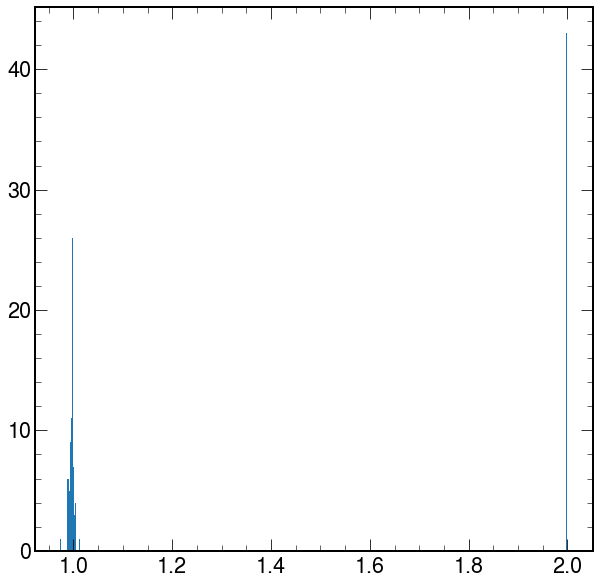

In [5]:
plt.hist(ak.flatten(inp.musf_tight_reliso_stat_up), bins=500)
# plt.xlim(0, 0.1)
None

In [19]:
list(cppyy.gbl.get_mu_tight_reliso_sf("stat", [-0.5], [14]))

[1.0]

## b-tag SFs

In [3]:
from Corrections.BTV.btag_SF import *
btag_mod = btag_SFRDFProducer(year=2018, isUL=True, isMC=True, ispreVFP=False)

In [5]:
list(cppyy.gbl._btag_SF.get_btag_sf([50.], [2.], [1.], [10.], 
                               [5], [2], [4], [0.8], 
                               [], [], [], [],
                               "central", "central", "down_hfstats1"))

[0.9787099329362282, 0.9551077095638657, 0.9308019149722525, 1.0]

In [15]:
cppyy.gbl.std.string("down_cferr").rfind("cferr", 5)

5

In [6]:
reshape_uncertainties = ["central", "down_cferr1", "down_cferr2", "down_hf", "down_hfstats1", "down_hfstats2",  "down_lf", "down_lfstats1", "down_lfstats2", "down_jesAbsoluteMPFBias", "down_jesAbsoluteScale", "down_jesAbsoluteStat", "down_jesFlavorQCD",
        "down_jesFragmentation", "down_jesPileUpDataMC", "down_jesPileUpPtBB", "down_jesPileUpPtEC1",
        "down_jesPileUpPtEC2", "down_jesPileUpPtHF", "down_jesPileUpPtRef", "down_jesRelativeBal",
        "down_jesRelativeFSR", "down_jesRelativeJEREC1", "down_jesRelativeJEREC2", "down_jesRelativeJERHF",
        "down_jesRelativePtBB", "down_jesRelativePtEC1", "down_jesRelativePtEC2", "down_jesRelativePtHF",
        "down_jesRelativeSample", "down_jesRelativeStatEC", "down_jesRelativeStatFSR",
        "down_jesRelativeStatHF", "down_jesSinglePionECAL", "down_jesSinglePionHCAL", "down_jesTimePtEta",
        "up_cferr1", "up_cferr2", "up_hf", "up_hfstats1", "up_hfstats2",  "up_lf", "up_lfstats1", "up_lfstats2",
        "up_jesAbsoluteMPFBias", "up_jesAbsoluteScale", "up_jesAbsoluteStat",
        "up_jesFlavorQCD", "up_jesFragmentation", "up_jesPileUpDataMC", "up_jesPileUpPtBB",
        "up_jesPileUpPtEC1", "up_jesPileUpPtEC2", "up_jesPileUpPtHF", "up_jesPileUpPtRef",
        "up_jesRelativeBal", "up_jesRelativeFSR", "up_jesRelativeJEREC1", "up_jesRelativeJEREC2",
        "up_jesRelativeJERHF", "up_jesRelativePtBB", "up_jesRelativePtEC1", "up_jesRelativePtEC2",
        "up_jesRelativePtHF", "up_jesRelativeSample", "up_jesRelativeStatEC", "up_jesRelativeStatFSR",
        "up_jesRelativeStatHF", "up_jesSinglePionECAL", "up_jesSinglePionHCAL", "up_jesTimePtEta"]

In [9]:
# fRVec Jet_pt, fRVec Jet_eta, fRVec Jet_phi, fRVec Jet_mass,
#     iRVec Jet_jetId, iRVec Jet_puId, iRVec Jet_hadronFlavour, fRVec Jet_btagDeepFlavB,
#     fRVec lepton_pt, fRVec lepton_eta, fRVec lepton_phi, fRVec lepton_mass,
#     std::string incl_uncertainty, std::string comb_uncertainty, std::string shape_uncertainty
for reshape_unc in reshape_uncertainties:
    print(reshape_unc)
    try:
        print(list(cppyy.gbl._btag_SF.get_btag_sf([500.], [0.1], [1.], [10.], 
                                [5], [2], [4], [0.1], 
                                [], [], [], [],
                                "central", "central", reshape_unc)))
    except Exception as e:
        print(e)

central
[0.9540062593751429, 1.0, 1.0, 1.0]
down_cferr1
[0.9540062593751429, 1.0, 1.0, 0.6659704652158629]
down_cferr2
[0.9540062593751429, 1.0, 1.0, 0.8304855577922161]
down_hf
[0.9540062593751429, 1.0, 1.0, 1.0]
down_hfstats1
[0.9540062593751429, 1.0, 1.0, 1.0]
down_hfstats2
[0.9540062593751429, 1.0, 1.0, 1.0]
down_lf
[0.9540062593751429, 1.0, 1.0, 1.0]
down_lfstats1
[0.9540062593751429, 1.0, 1.0, 1.0]
down_lfstats2
[0.9540062593751429, 1.0, 1.0, 1.0]
down_jesAbsoluteMPFBias
vector<double> btag_SFinterface::get_btag_sf(ROOT::VecOps::RVec<float> Jet_pt, ROOT::VecOps::RVec<float> Jet_eta, ROOT::VecOps::RVec<float> Jet_phi, ROOT::VecOps::RVec<float> Jet_mass, ROOT::VecOps::RVec<int> Jet_jetId, ROOT::VecOps::RVec<int> Jet_puId, ROOT::VecOps::RVec<int> Jet_hadronFlavour, ROOT::VecOps::RVec<float> Jet_btagDeepFlavB, ROOT::VecOps::RVec<float> lepton_pt, ROOT::VecOps::RVec<float> lepton_eta, ROOT::VecOps::RVec<float> lepton_phi, ROOT::VecOps::RVec<float> lepton_mass, string incl_uncertainty,

#################### ERROR : Correctionlib evalutaion failed Index not available in Category for input argument 1 val: 4
while evaluating deepJet_shape with input variables systematic(), flavor(hadron flavor definition: 5=b, 4=c, 0=udsg), abseta(), pt(), discriminant(deepJet output value), 
Input values : down_jesAbsoluteMPFBias, 4, 0.100000, 500.000000, 0.100000, 
#################### ERROR : Correctionlib evalutaion failed Index not available in Category for input argument 1 val: 4
while evaluating deepJet_shape with input variables systematic(), flavor(hadron flavor definition: 5=b, 4=c, 0=udsg), abseta(), pt(), discriminant(deepJet output value), 
Input values : down_jesAbsoluteScale, 4, 0.100000, 500.000000, 0.100000, 
#################### ERROR : Correctionlib evalutaion failed Index not available in Category for input argument 1 val: 4
while evaluating deepJet_shape with input variables systematic(), flavor(hadron flavor definition: 5=b, 4=c, 0=udsg), abseta(), pt(), discriminan

## Tau SFs

In [3]:
from Corrections.TAU.tauCorrections import *
btag_mod = TauSFRDFProducer(year=2018, isUL=True, isMC=True, ispreVFP=False, vsjet_wps=["VVVLoose", "Medium"],
        vse_wps=["VVLoose"],
        vsmu_wps=["VLoose", "Tight"])

In [4]:
list(cppyy.gbl.get_deeptau_vsjet_sf([32], [5], [5], "Medium", "VVLoose", "", "dm"))

[1.0]